In [1]:

# site: colab.research.google.com
# Logar com o e-mail da Puc
# Novo NoteBook de Robson Duarte


# Instala a biblioteca
!pip install numpy
!pip install matplotlib
!pip install tensorflow

import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
# Importando pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Carrega conjunto de dados
dados = pd.read_csv('/content/AlgarismosTreinamento.txt', header=None)



# Ver dados
dados.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Tamanho da matriz
dados.shape


(70000, 785)

In [5]:

# Divide em Entrada e Resposta
X1 = dados.iloc[:,1:785] #Entrada
X1






,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Normnaliza os dados
scaler = StandardScaler()
XX = scaler.fit_transform(X1)

XX





array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# Dados Respostas
Y1 = dados.iloc[:,0] #Resposta
Y = Y1.values
Y





array([5, 0, 4, ..., 5, 6, 8])

In [8]:



# Transforma os dados
Y2 = []
for i in range(len(Y)):
    linha = []
    for j in range(10):
      if (j) == Y[i]:
        linha += [1]
      else:
        linha += [0]
    Y2.append(linha)


YY = pd.DataFrame(data=Y2,columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Ver Y
YY.head()



,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


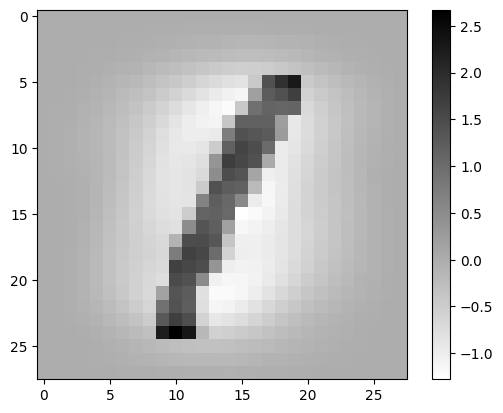

In [9]:
# Mostra Imagens
plt.figure()
m = np.zeros((28, 28))
k = 0
for i in range(28):
    for j in range(28):
      if (k) < 785:
        m[i][j] = (XX[77][k])
        k = k + 1

plt.imshow(m, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()




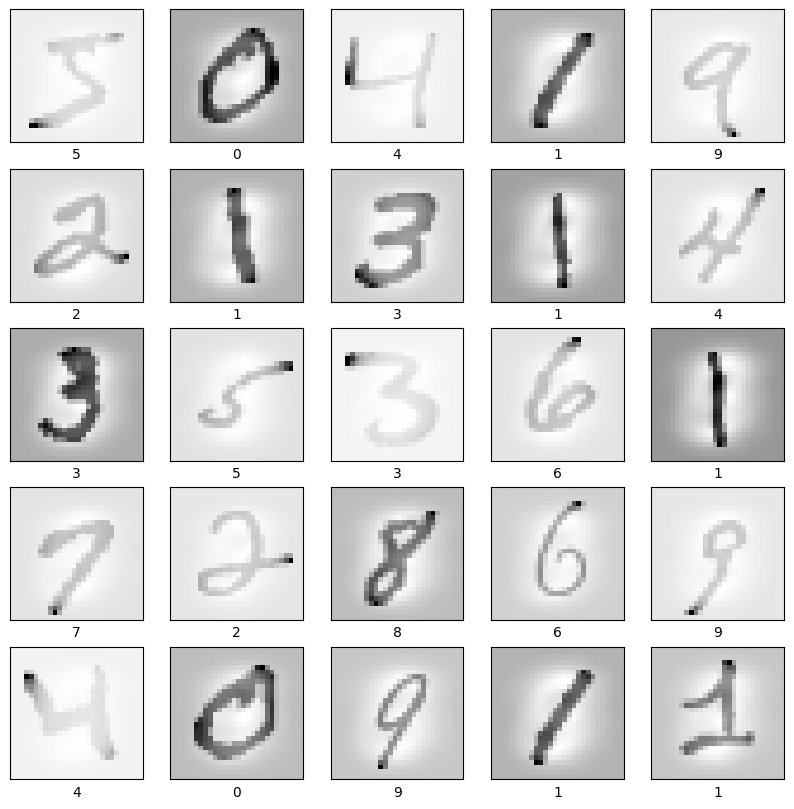

In [10]:
# Mostra todos os tipos de roupa
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    m = np.zeros((28, 28))
    k = 0
    for l in range(28):
      for j in range(28):
        if (k) < 785:
          m[l][j] = (XX[i][k])
          k = k + 1

    plt.imshow(m, cmap=plt.cm.binary)
    plt.xlabel(class_names[Y[i]])
plt.show()


In [11]:
# Carrega conjunto de teste
testes = pd.read_csv('/content/AlgarismosTeste.txt',header=None)

# Ver testes
testes.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:

# Divide em Entrada
Xtestes1 = testes.iloc[:,1:785] #Entrada

# Ver os testes
Xtestes1

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Normnaliza os dados de testes
scaler = StandardScaler()
Xt = scaler.fit_transform(Xtestes1)

Xt




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:

Yt1 = testes.iloc[:,0] #Resposta
Yt = Yt1.values
Yt


array([7, 2, 1, ..., 4, 5, 6])

In [15]:

# Transforma os dados de teste
Yt2 = []
for i in range(len(Yt)):
    linha = []
    for j in range(10):
      if (j) == Yt[i]:
        linha += [1]
      else:
        linha += [0]
    Yt2.append(linha)


YYt = pd.DataFrame(data=Yt2,columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Ver Y
YYt.head()



,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [16]:
YYt.shape


(10000, 10)

In [17]:

# Define o Modelo
modelo = Sequential()
modelo.add(Dense(30, input_dim=784, activation='relu'))
# modelo.add(Dense(28, activation='relu'))
modelo.add(Dense(10, activation='softmax'))


In [18]:



# Compila o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Treina o Modelo
resultado = modelo.fit(XX, YY, batch_size = 128, epochs = 200, verbose=0, validation_data=(Xt, YYt))



In [21]:
# Mostra a rede
modelo.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │          23,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,582 (279.62 KB)

 Trainable params: 23,860 (93.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,722 (186.42 KB)

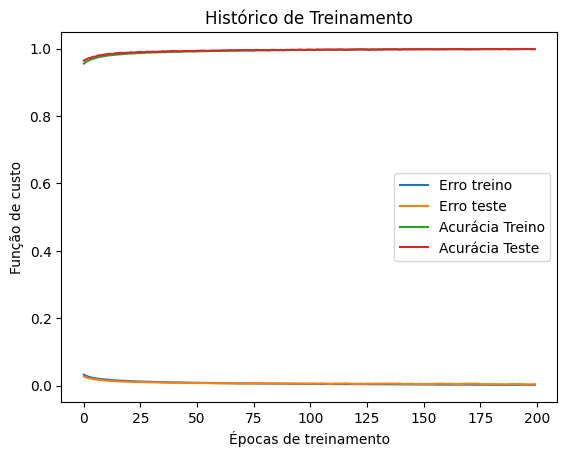

In [23]:
#Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.plot(resultado.history['accuracy'])
plt.plot(resultado.history['val_accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste', 'Acurácia Treino', 'Acurácia Teste'])
plt.show()



In [24]:

# Testa a rede
Y_predito = modelo.predict(Xt)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [25]:
Y_predito1 = np.array([])
Yr = np.array([])
for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_predito1 = np.concatenate((Y_predito1,Y_parte))
    for j in range(len(Y_parte)):
      if Y_parte[j]==1:
        Resp = ([j+1])

    Yr = np.concatenate((Yr,Resp))


Yr




A saída de streaming foi truncada nas últimas 5000 linhas.
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0

array([8., 3., 2., ..., 5., 6., 7.])

In [26]:

YYr = np.array([])
for i in range(len(Yr)):
  if Yr[i] == 10:
    r = "9"
  if Yr[i] == 9:
    r = "8"
  if Yr[i] == 8:
    r = "7"
  if Yr[i] == 7:
    r = "6"
  if Yr[i] == 6:
    r = "5"
  if Yr[i] == 5:
    r = "4"
  if Yr[i] == 4:
    r = "3"
  if Yr[i] == 3:
    r = "2"
  if Yr[i] == 2:
    r = "1"
  if Yr[i] == 0:
    r = "0"

  YYr = np.concatenate((YYr,[r]))

YYr




array(['7', '2', '1', ..., '4', '5', '6'], dtype='<U32')

In [29]:
# Contagem de Acertos
total = 0
correto = 0
errado = 0
for i in range(len(Yt)):
  total=total+1
  if(Yt[i] == Yr[i]-1):
    correto=correto+1
  else:
    errado=errado+1

print("Total " + str(total))
print("Correto " + str(correto))
print("Errado " + str(errado))



Total 10000
Correto 9985
Errado 15


In [28]:


# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')


0B -> L1N0: -1.828231692314148
0B -> L1N1: -2.021045207977295
0B -> L1N2: -0.2868773341178894
0B -> L1N3: -0.3499663770198822
0B -> L1N4: -2.7508559226989746
0B -> L1N5: -1.6699310541152954
0B -> L1N6: -0.6431375741958618
0B -> L1N7: 0.19691267609596252
0B -> L1N8: 0.24210524559020996
0B -> L1N9: 1.1361368894577026
0B -> L1N10: -0.7664585709571838
0B -> L1N11: 0.7040093541145325
0B -> L1N12: -1.548074722290039
0B -> L1N13: -2.2851498126983643
0B -> L1N14: -0.7349411845207214
0B -> L1N15: 0.1823311746120453
0B -> L1N16: -0.1700964719057083
0B -> L1N17: -1.818806767463684
0B -> L1N18: -0.6952680349349976
0B -> L1N19: 0.36316338181495667
0B -> L1N20: -2.226454973220825
0B -> L1N21: -0.6883761286735535
0B -> L1N22: -0.08017340302467346
0B -> L1N23: 0.22000089287757874
0B -> L1N24: -1.7517586946487427
0B -> L1N25: 0.8169145584106445
0B -> L1N26: -2.8933041095733643
0B -> L1N27: -0.26226356625556946
0B -> L1N28: -0.12155348807573318
0B -> L1N29: -1.635908842086792
L0N0                   -> L